# Submitted by: Ahmed Islam
## Assignment: 10
## Hope To Skills
## Free Artificial Intelligence Course

# This assignment cover the foolowing aspects
# Perform EDA on the Dataset Which should include
## a. Visualization and explore the data using seaborn
i. Add your findings about the data under each graph in the code notebook
## b. Identify the data patterns if exist for single/multiple variables
i. Write your findings under the plots or code that identify the pattern
## c. Clean the dataset, remove the missing values as mentioned in the Lectures 15
i. Explain your approach in the Collab notebook text cell
## d. Select the target variable and clearly mention the reason for selecting it.
## e. Transform the Dataset
i. Transform the whole dataset (Features , Target Variable)
## f. Split the Dataset into train and test set
# Use the Scikit Learn Library to Make the Classification Models
a. Use the different regression models
1. Logistic regression regression
2. Decision tree Classifier
3. Random forest Classifier
4. Gradient boosting Classifier
# You have to report the result with the following combinations
Make the Confusion Matrix, Report the Accuracy, Precision and Recall
1. Without feature scaling
2. With only feature scaling (without target variable)
3. With feature and target variable scaling
# What evaluation metric should we use and why provide the reason for that.


# Important libraries

In [239]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import sklearn
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]

warnings.simplefilter(action="ignore", category= FutureWarning)

**Loading data file**

In [240]:
data= pd.read_csv("/content/diabetes.csv")

# EDA

In [241]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [132]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [243]:
data.shape

(768, 9)

In [242]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [245]:
duplicate_rows= data[data.duplicated()]
duplicate_rows.shape

(0, 9)

 In our data there is no duplicate values

#**Outlier checking**

**BoxPlot:** For checking outliers i am using Box plot

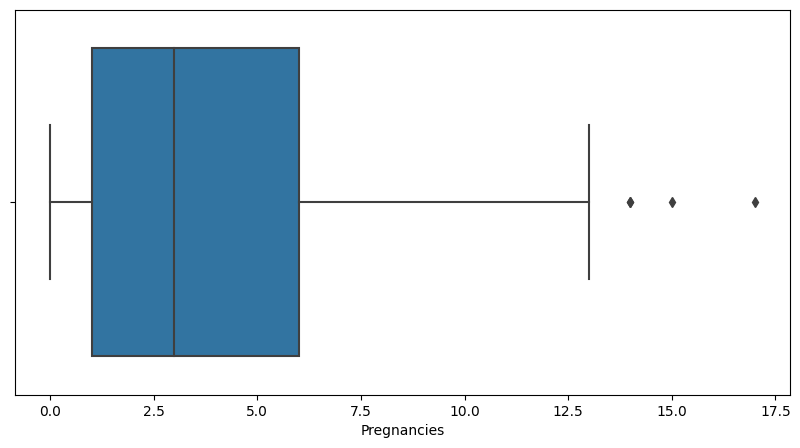

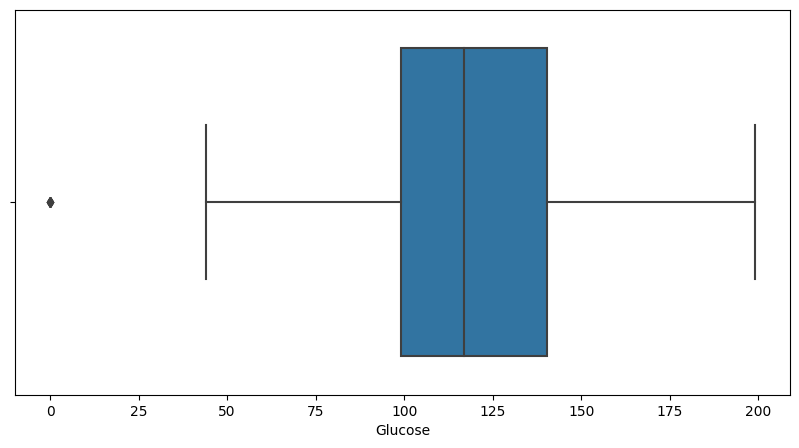

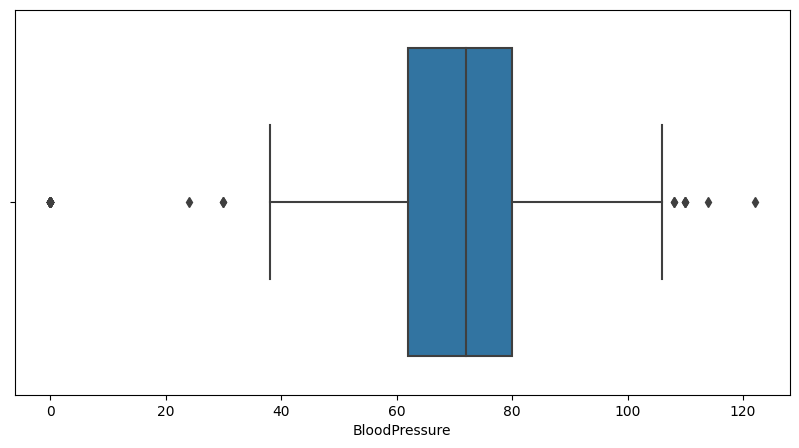

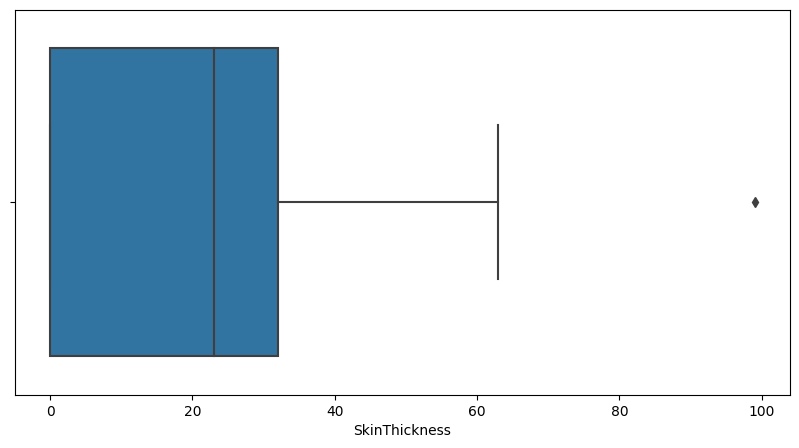

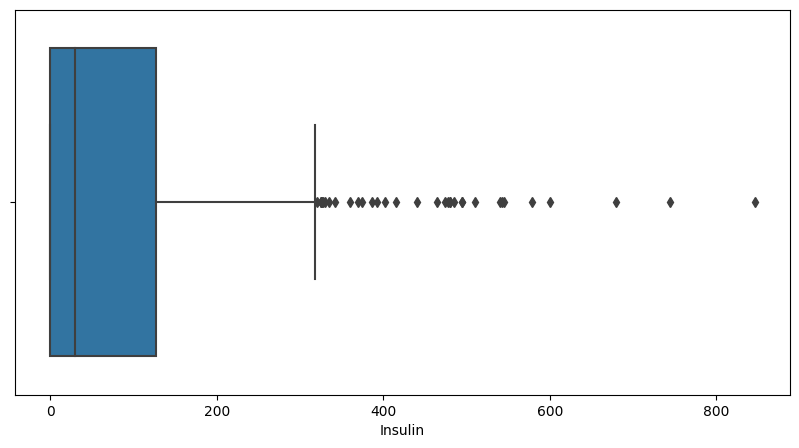

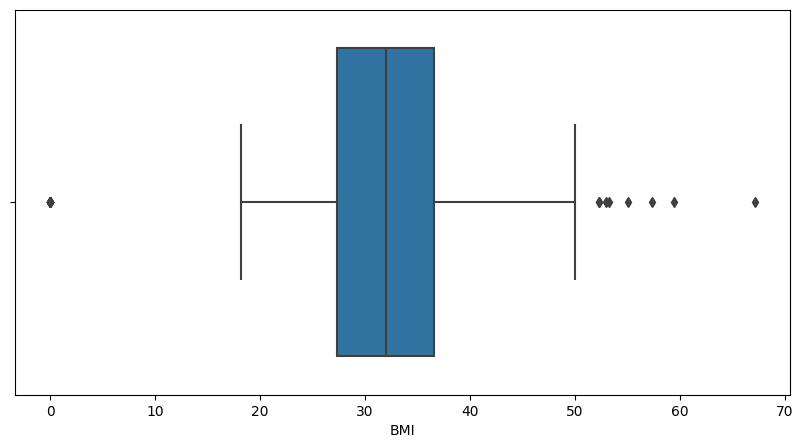

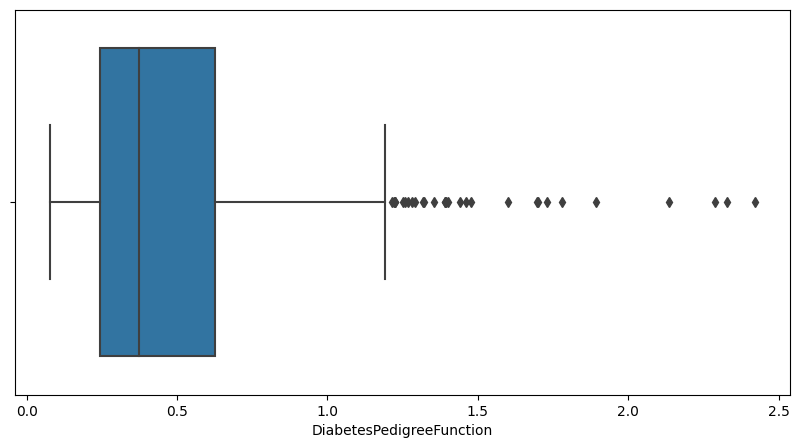

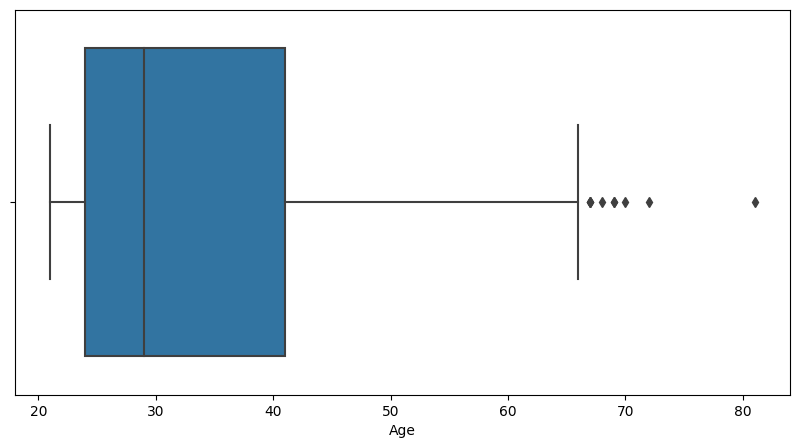

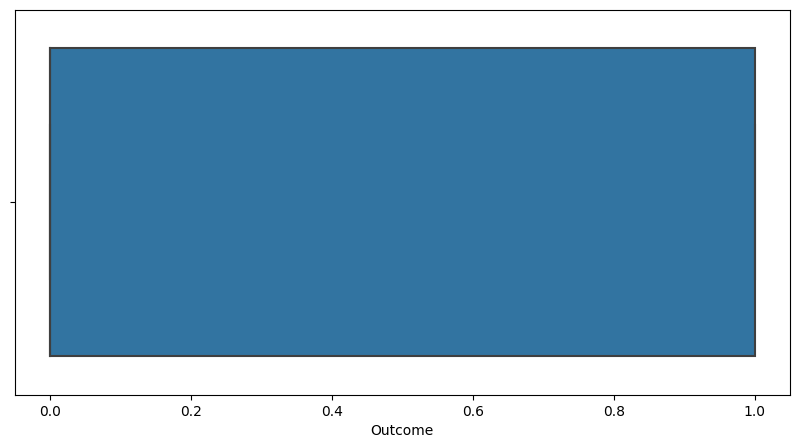

In [246]:
for c in data.columns:
    plt.figure()
    sns.boxplot(x = c, data = data)

In [247]:
# Define a function to remove outliers

# k parameter to control the sensitivity of outlier removal.
def remove_outliers(data, column, k=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

**Here's the "lower bound" and "upper bound" come in. We are going to draw lines at the lower end and the upper end of the middle range. If a score is way below the lower line or way above the upper line, then we'll consider it an outlier and remove it. The lower bound is like the lowest acceptable score, and the upper bound is the highest acceptable score.**

In [248]:
# Specify columns to consider for outlier removal

columns_to_check = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Iterate through columns and remove outliers using Tukey's fences
for col in columns_to_check:
    data = remove_outliers(data, col)

In [249]:
print("New Data Shape: ", data.shape)

New Data Shape:  (636, 9)


#**Visualization**

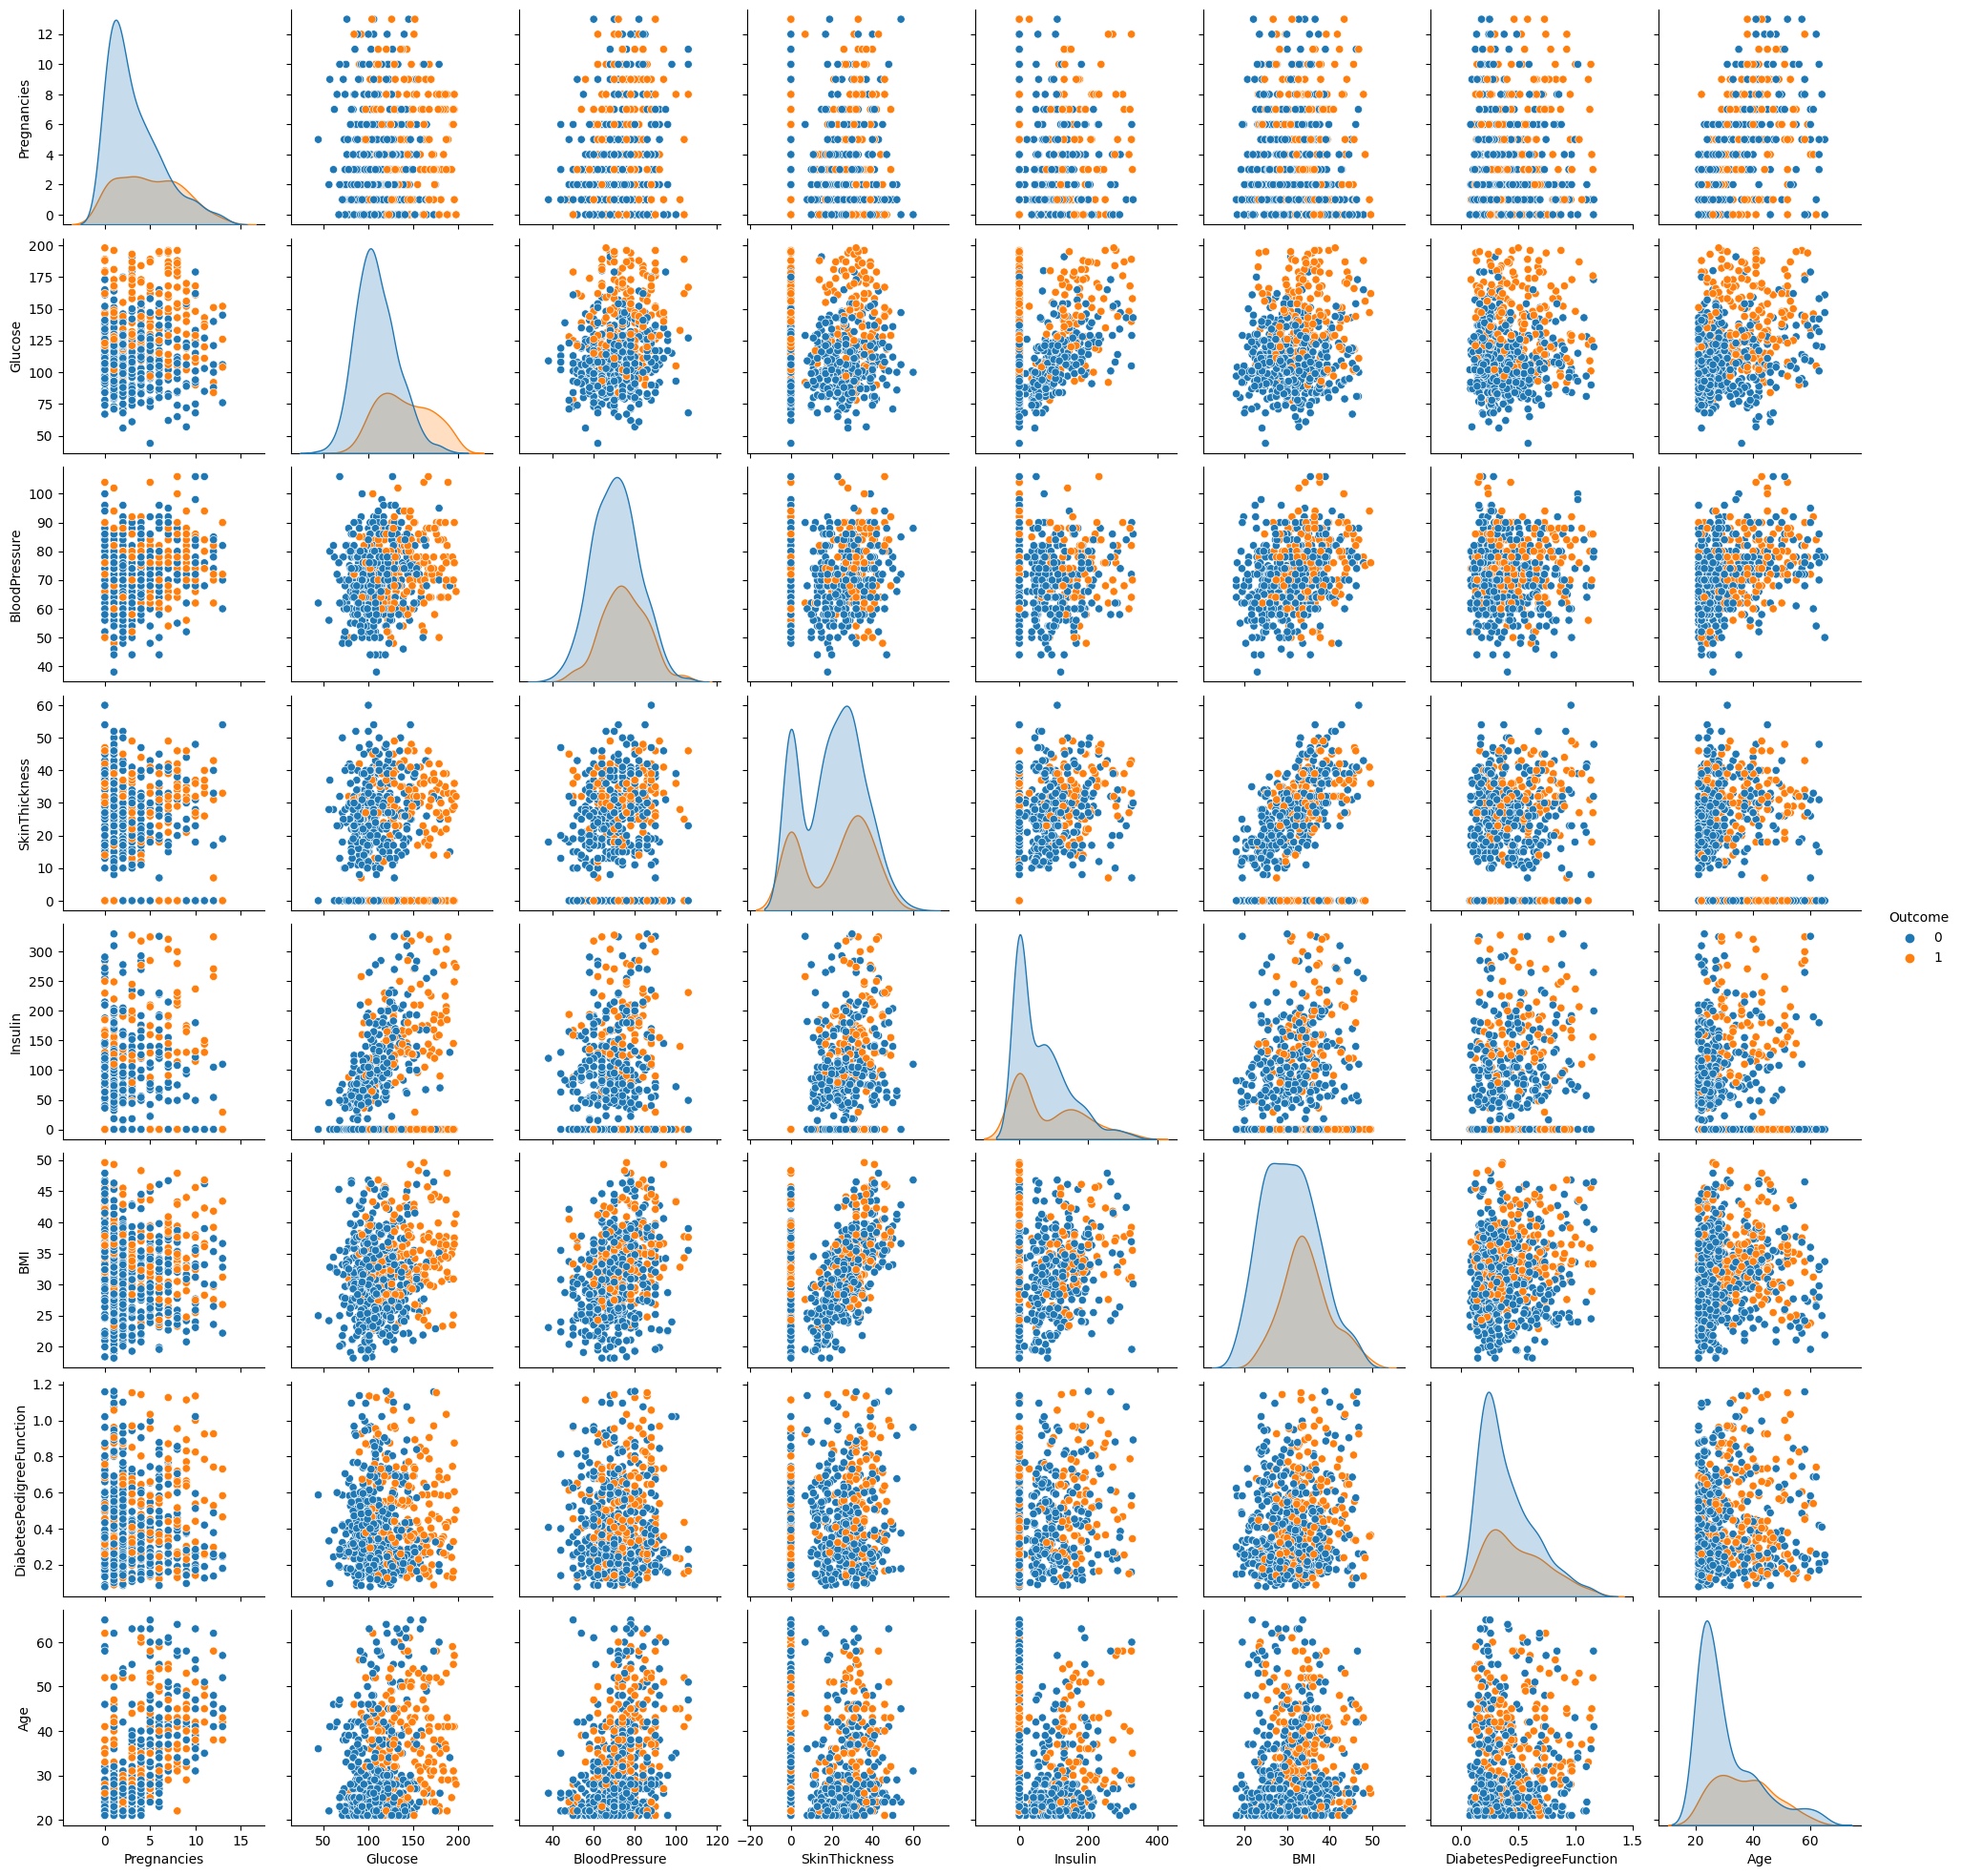

In [250]:
sns.pairplot(data=data, hue= "Outcome" )

**Conclusion:** The pairPlot help us to visualize relationships between pairs of features.

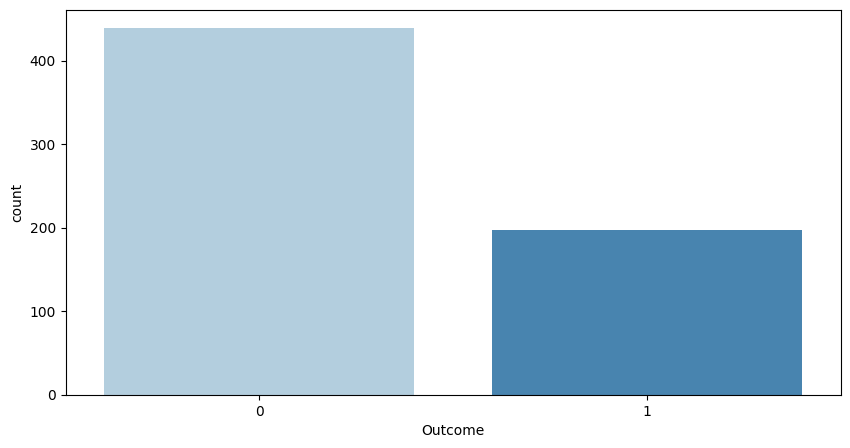

In [251]:
sns.countplot(x="Outcome", data=data, palette="Blues")
plt.show()

**Conclution** I saw a lot of zero values in Outcome column. This mean that the number of diabatic patient is less as compare to the non diabatic patient.

<Axes: xlabel='Age', ylabel='Insulin'>

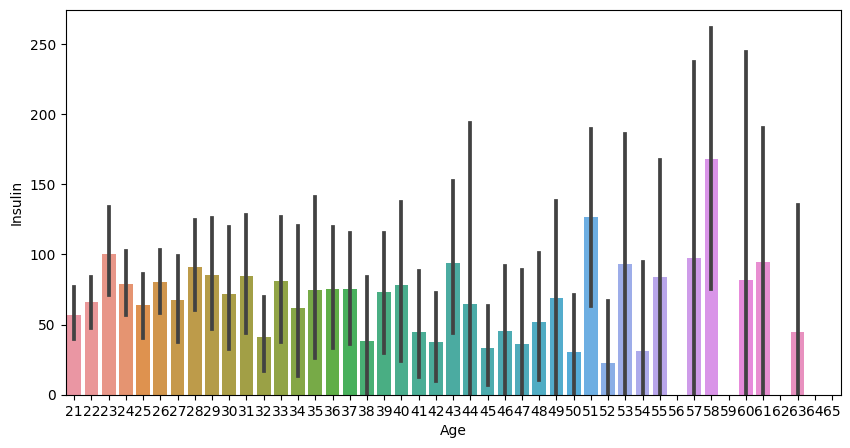

In [252]:
sns.barplot(x="Age", y="Insulin", data=data)

**Conclusion:**This graph demonstrate the relationship between the age and insluin uptake.

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

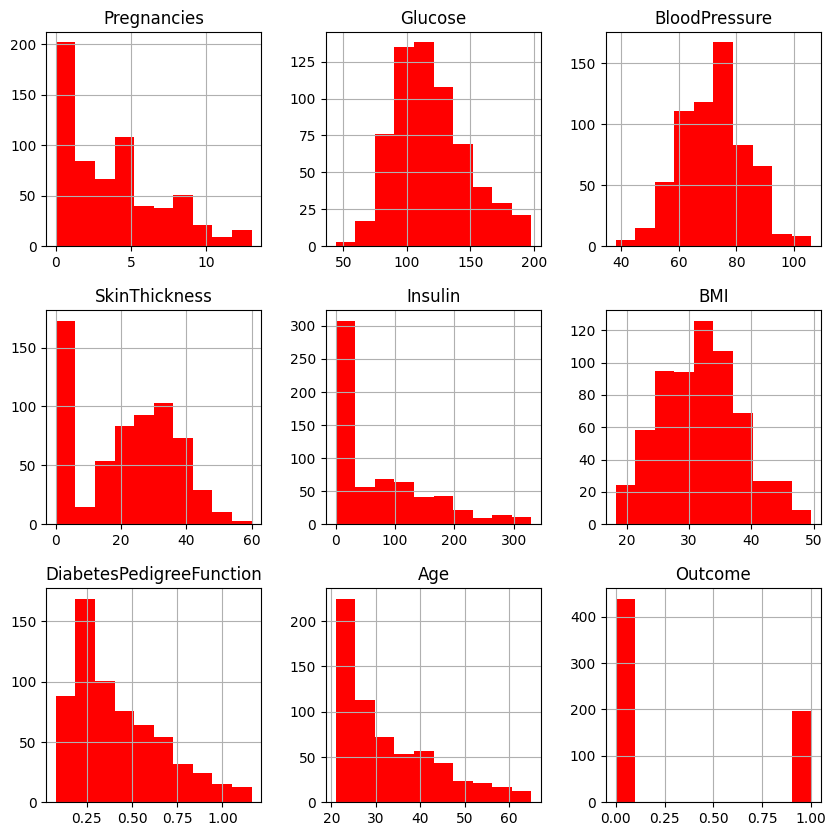

In [282]:
# Plot histogram for each feature
data.hist(bins=10, color="red", figsize=(10,10))

**Checking Relationship between features By using correlation**

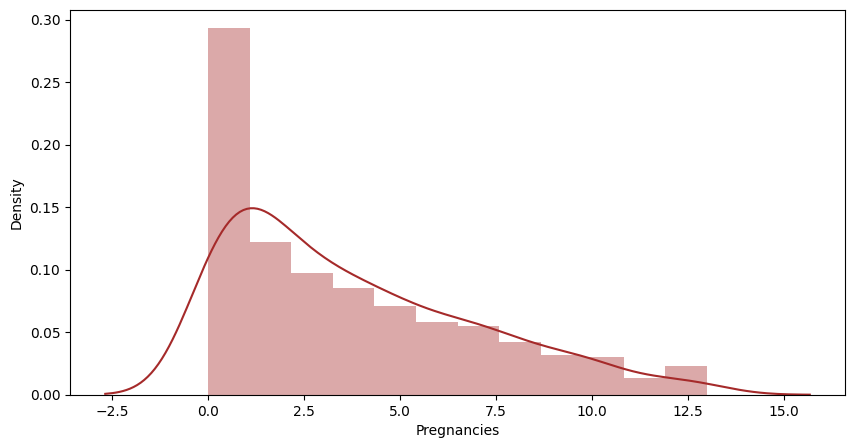

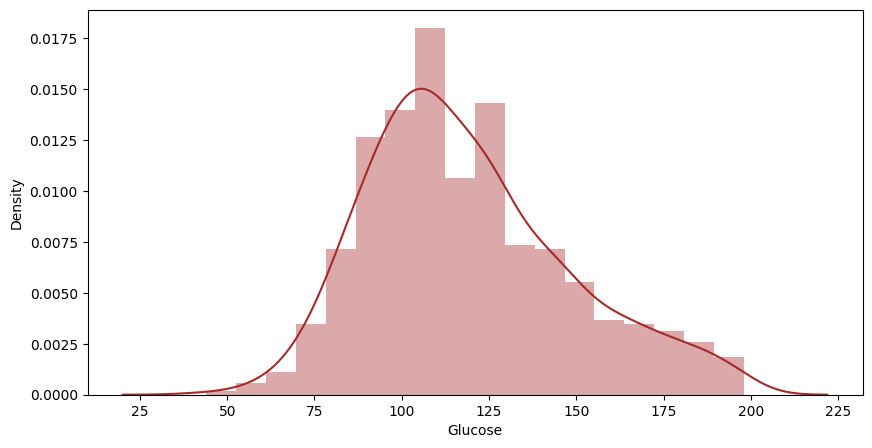

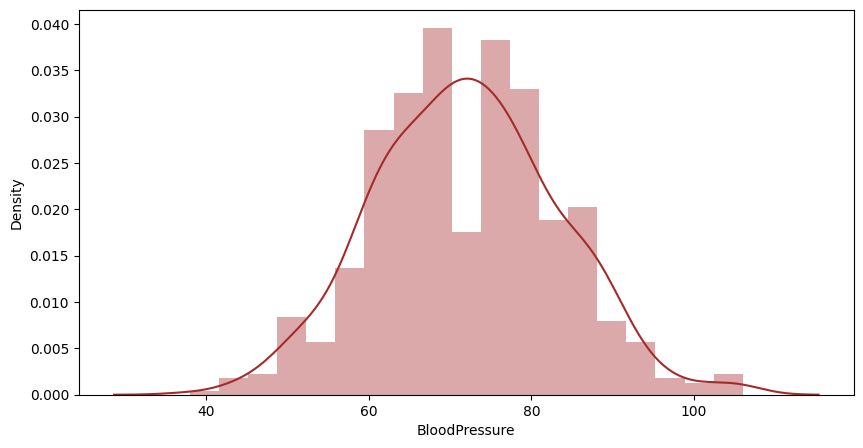

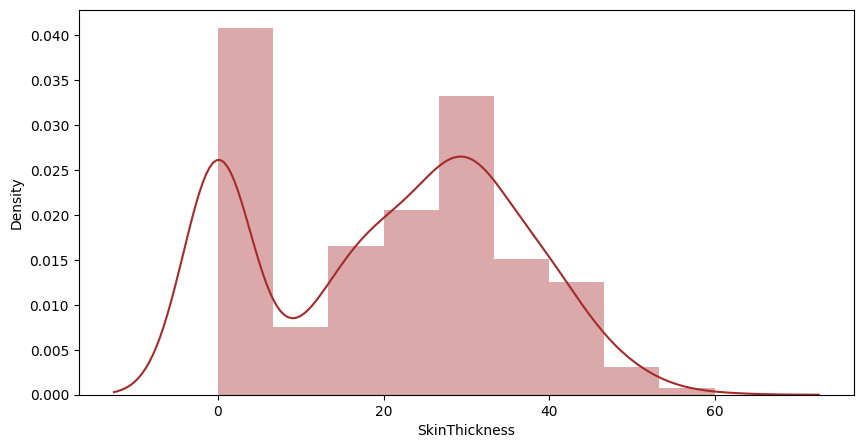

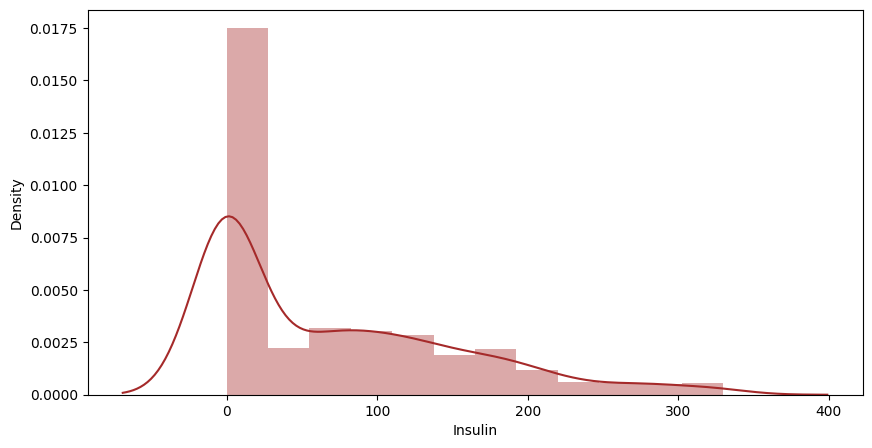

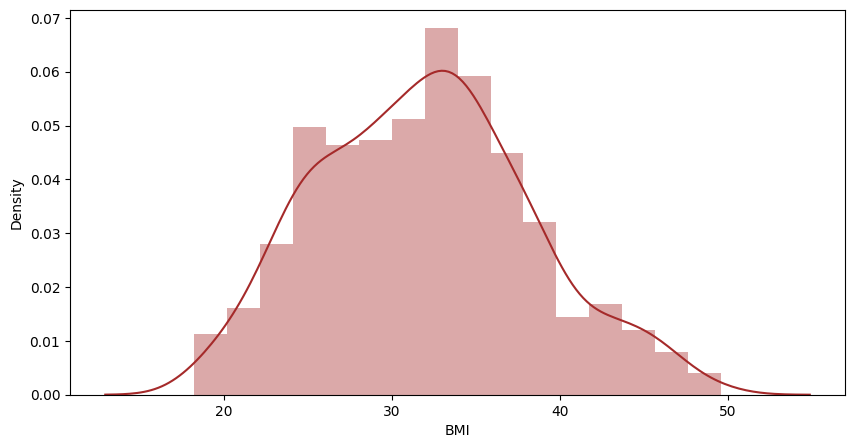

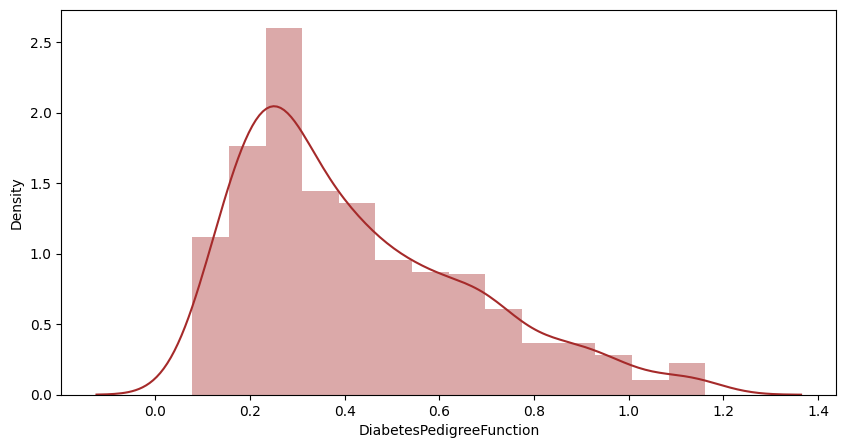

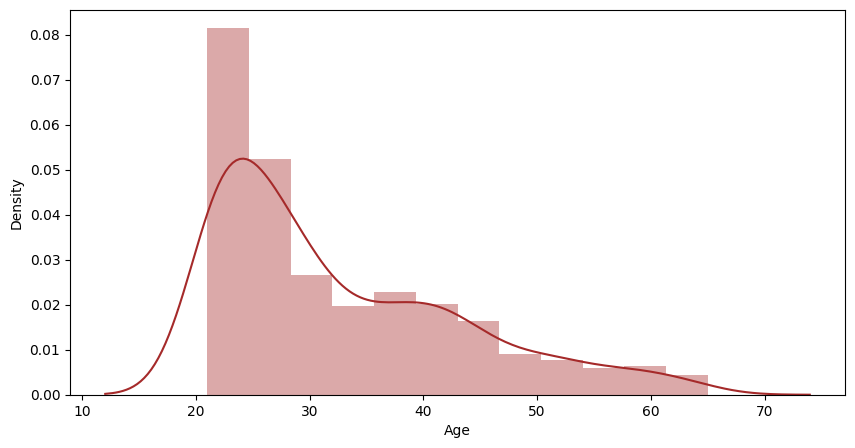

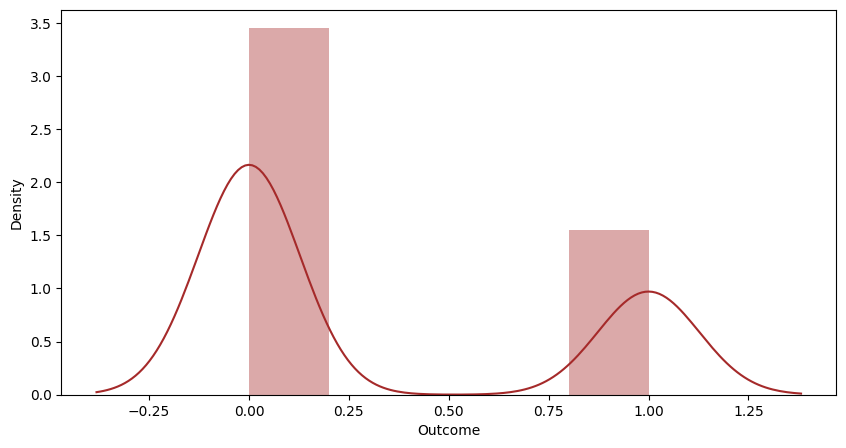

In [284]:
for i in data.columns:
    plt.figure()
    sns.distplot(data[i], color="brown")
    plt.show()

In [254]:
df=data.corr()

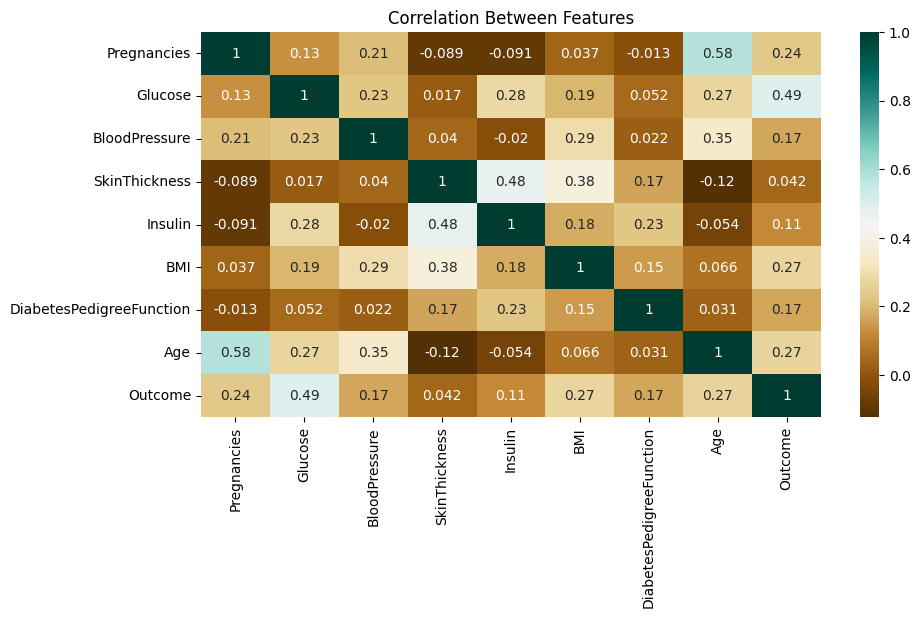

In [255]:
sns.heatmap(data=df, annot=True,cmap="BrBG")
plt.title("Correlation Between Features")
plt.show()

# **Select the target variable and clearly mention the reason for selecting it**

**This dataset contains various medical features of female patients and their diabetes status. The target variable in this dataset is usually the "Outcome" column, which indicates whether a patient has diabetes (1) or not (0).**

# **Feature Scaling**

In [261]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

#putting feature variable to x
x = data[["Pregnancies","Glucose", "BloodPressure", "SkinThickness",
          "Insulin",'BMI','DiabetesPedigreeFunction','Age']]
x=pd.DataFrame(std.fit_transform(x))

# Create target variable
y = data[['Outcome']]


In [257]:
x.shape

(636, 8)

In [258]:
x

,0,1,2,3,4,5,6,7
0,0.681426,1.005403,-0.000696,0.936596,-0.826197,0.256438,0.819791,1.604688
1,-0.857590,-1.168963,-0.532036,0.542370,-0.826197,-0.840893,-0.307223,-0.143041
2,1.297032,2.213384,-0.709149,-1.363054,-0.826197,-1.358207,1.003543,-0.051055
3,-0.857590,-1.030908,-0.532036,0.148145,0.299065,-0.605751,-1.058566,-1.062898
4,0.373623,-0.099037,0.176417,-1.363054,-0.826197,-0.997655,-0.919731,-0.235026
...,...,...,...,...,...,...,...,...
631,1.912638,-0.616743,0.353530,1.790752,1.328560,0.146705,-1.042232,2.800503
632,-0.549787,0.108045,-0.177809,0.410962,-0.826197,0.758076,-0.352141,-0.510984
633,0.373623,0.073532,-0.000696,0.148145,0.514540,-0.903598,-0.740062,-0.235026
634,-0.857590,0.246100,-1.063375,-1.363054,-0.826197,-0.292227,-0.315390,1.328731


In [259]:
y.shape

(636, 1)

In [260]:
y

,Outcome
0,1
1,0
2,1
3,0
5,0
...,...
763,0
764,0
765,0
766,1


# **Spliting the Dataset into train and test set**

In [262]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x, y, test_size=0.25,
                                                random_state=101)

# Model Training

In [263]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

# **Model Evaluation**

Logistic Regression
Accuracy value is:  80.5
Precision value is:  66.67
Recall value is:  55.81
Confusion Matrix:
 [[104  12]
 [ 19  24]]


<Axes: >

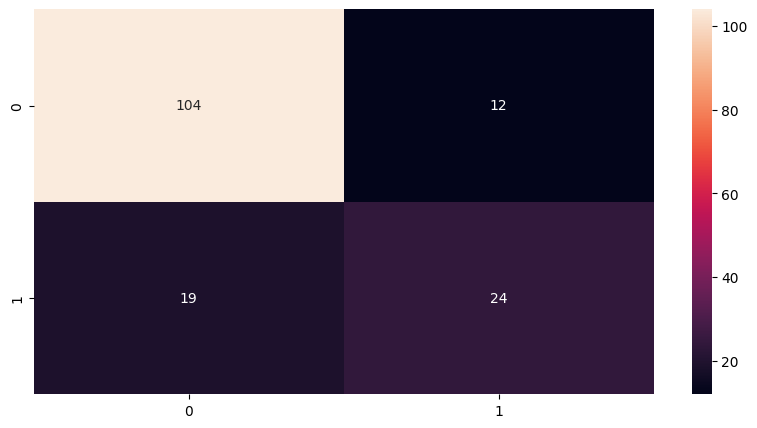

In [264]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix

y_pred = lr.predict(x_test)

print("Logistic Regression")

lr_accuracy = round(accuracy_score(y_test, y_pred) * 100,2)
lr_precision = round(precision_score(y_test, y_pred) * 100,2)
lr_recall = round(recall_score(y_test, y_pred) * 100,2)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy value is: ", lr_accuracy)
print("Precision value is: ", lr_precision)
print("Recall value is: ", lr_recall)
print("Confusion Matrix:\n", confusion)

#heat map for confusion matrixs
sns.heatmap(confusion, annot=True, fmt="d")

# Decision Tree

In [265]:
from sklearn.tree import DecisionTreeClassifier

DT= DecisionTreeClassifier()

DT.fit(x_train,y_train)

DecisionTreeClassifier()

 Decision Tree
Accuracy value is:  69.81
Precision value is:  44.9
Recall value is:  51.16
Confusion Matrix:
 [[89 27]
 [21 22]]


<Axes: >

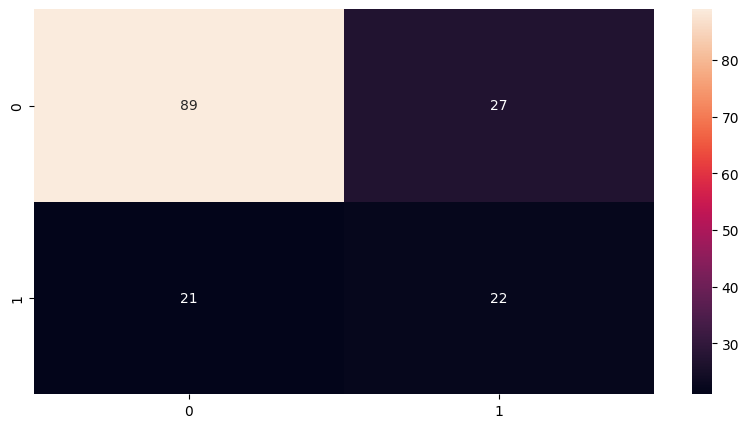

In [266]:
from sklearn.metrics import accuracy_score

y_pred= DT.predict(x_test)
print(" Decision Tree")


DT_accuracy = round(accuracy_score(y_test, y_pred) * 100,2)
DT_precision = round(precision_score(y_test, y_pred) * 100,2)
DT_recall = round(recall_score(y_test, y_pred) * 100,2)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy value is: ", DT_accuracy)
print("Precision value is: ", DT_precision)
print("Recall value is: ", DT_recall)
print("Confusion Matrix:\n", confusion)

#heatmap for Confusion matrix
sns.heatmap(confusion, annot=True, fmt="d")

# Random Forest Classifier

In [267]:
from sklearn.ensemble  import RandomForestClassifier

RFC= RandomForestClassifier()

RFC.fit(x_train,y_train)


RandomForestClassifier()

RandomForestClassifier
Accuracy value is:  78.62
Precision value is:  62.86
Recall value is:  51.16
Confusion Matrix:
 [[103  13]
 [ 21  22]]


<Axes: >

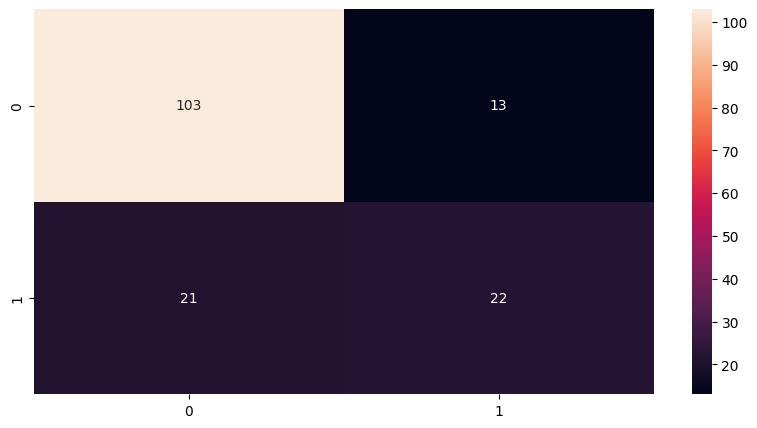

In [268]:
y_pred= RFC.predict(x_test)

print("RandomForestClassifier")


RDF_Accuracy = round(accuracy_score(y_test, y_pred) * 100,2)
RDF_precision = round(precision_score(y_test, y_pred) * 100,2)
RDF_recall = round(recall_score(y_test, y_pred) * 100,2)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy value is: ", RDF_Accuracy)
print("Precision value is: ", RDF_precision)
print("Recall value is: ", RDF_recall)
print("Confusion Matrix:\n", confusion)

#heatmap for Confusion matrix
sns.heatmap(confusion, annot=True, fmt="d")

# **Gradient Boosting Classifier**

In [269]:
from sklearn.ensemble import GradientBoostingClassifier

GBC= GradientBoostingClassifier()
GBC.fit(x_train, y_train)

GradientBoostingClassifier()

GradientBoostingClassifier
Accuracy value is:  77.99
Precision value is:  59.52
Recall value is:  58.14
Confusion Matrix:
 [[99 17]
 [18 25]]


<Axes: >

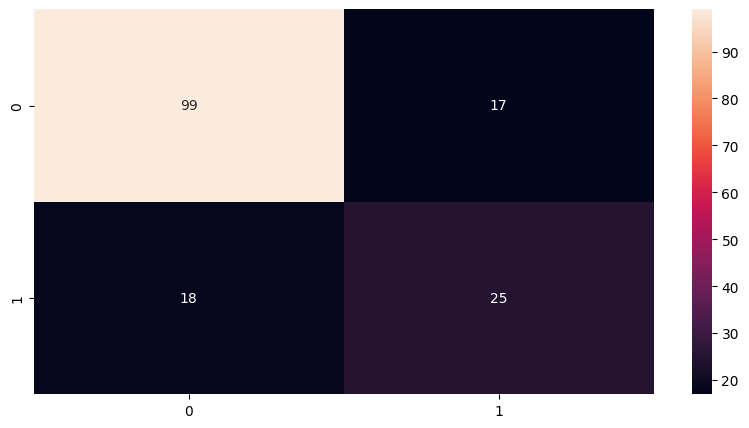

In [270]:
y_pred= GBC.predict(x_test)
print("GradientBoostingClassifier")


GBC_Accuracy = round(accuracy_score(y_test, y_pred) * 100,2)
GBC_precision = round(precision_score(y_test, y_pred) * 100,2)
GBC_recall = round(recall_score(y_test, y_pred) * 100,2)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy value is: ", GBC_Accuracy)
print("Precision value is: ", GBC_precision)
print("Recall value is: ", GBC_recall)
print("Confusion Matrix:\n", confusion)

#heatmap for Confusion matrix
sns.heatmap(confusion, annot=True, fmt="d")

# Report
### without feature scaling

In [271]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Without Feature Scaling
models_no_scaling = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

report_no_scaling = {}

for model_name, model in models_no_scaling.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = round(accuracy_score(y_test, y_pred)*100,2)
    precision= round(precision_score(y_test, y_pred)*100,2)
    recall= round(recall_score(y_test, y_pred)*100,2)

    report_no_scaling[model_name] = accuracy
    report_no_scaling[model_name] = precision
    report_no_scaling[model_name] = recall


#report for no scaling
print("Report - No Scaling:")
for model, accuracy in report_no_scaling.items():
    print(f"{model} accuracy value: {accuracy}")
    print(f"{model} Precision value: {precision}")
    print(f"{model} Recall value: {recall}")
    print("-"*90)
    print('\n')

Report - No Scaling:
Logistic Regression accuracy value: 55.81
Logistic Regression Precision value: 59.52
Logistic Regression Recall value: 58.14
------------------------------------------------------------------------------------------


Decision Tree accuracy value: 55.81
Decision Tree Precision value: 59.52
Decision Tree Recall value: 58.14
------------------------------------------------------------------------------------------


Random Forest accuracy value: 58.14
Random Forest Precision value: 59.52
Random Forest Recall value: 58.14
------------------------------------------------------------------------------------------


Gradient Boosting accuracy value: 58.14
Gradient Boosting Precision value: 59.52
Gradient Boosting Recall value: 58.14
------------------------------------------------------------------------------------------




# **What evaluation metric should we use and why provide the reason for that.**


The choice of which metrics should we use  depends on the problem's nature and the specific costs or consequences associated with false positives and false negatives. For example, in a medical context like diabetes prediction, missing a positive case (high false negatives) might have more severe consequences, so recall might be more important. In other cases, a balance between precision and recall